### Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing the dataset
df =pd.read_csv(r'C:\Users\DELL\Downloads\loan_prediction.csv')
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
### Checking the shape of the dataset
df.shape

(614, 13)

In [4]:
### Checking the null values 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Most of the column has null values. Also there is column Loan_ID which has no contribution in the model building. So, I will drop this column and also I will fill the null values with the help of simpleImputer.

In [5]:
df.drop(columns='Loan_ID', inplace=True)

In [6]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan, strategy='mean')
df[['LoanAmount']]=si.fit_transform( df[['LoanAmount']])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
### Checking 
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Filled all the null values. Now I will change the object values in integers with lable incoder.

In [8]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
### Importing the Label Encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df[col]=df[col].apply(le.fit_transform)

In [10]:
### Checking the dataset again
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Dataset is all set to proceed further. Now I will proceed furthe toward EDA

## EDA

In [11]:
### Importing the basic visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

1    422
0    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

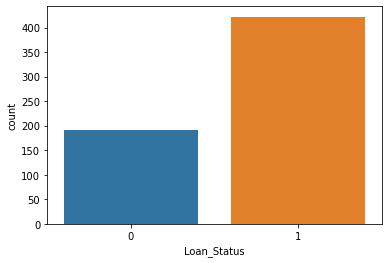

In [12]:
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=df)

### Conclusion - The number of count who is getting loan is greater.

1    502
0    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

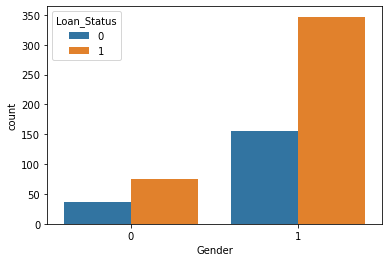

In [13]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', hue= 'Loan_Status', data=df)

### Conclusion - The male candidate getting more loan approval.

1    401
0    213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

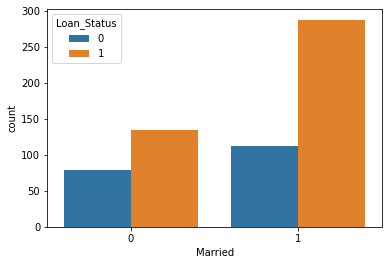

In [14]:
print(df['Married'].value_counts())
sns.countplot(x='Married', hue= 'Loan_Status', data=df)

### Conclusion - Married candidate getting more loan approval.

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

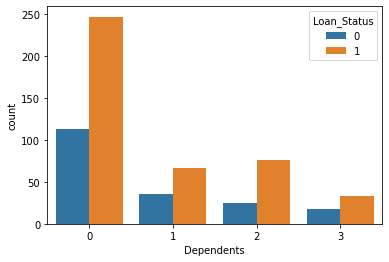

In [15]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', hue= 'Loan_Status', data=df)

### Conclusion - Who has no dependent getting loan approval more.

0    480
1    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

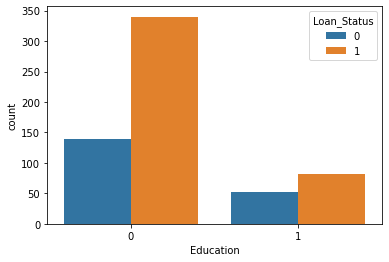

In [16]:
print(df['Education'].value_counts())
sns.countplot(x='Education', hue= 'Loan_Status', data=df)

### Conclusion - Who has Graduate Degree getting loan approval more.

0    532
1     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

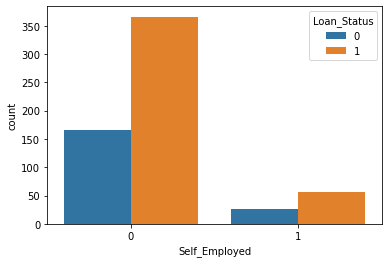

In [17]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', hue= 'Loan_Status', data=df)

### Conclusion - Candidate who has job getting loan approval more.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

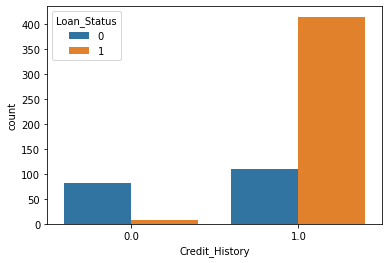

In [18]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', hue= 'Loan_Status', data=df)

### Conclusion - Candidate who has 1 credit history getting  more loan approval.

1    233
2    202
0    179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

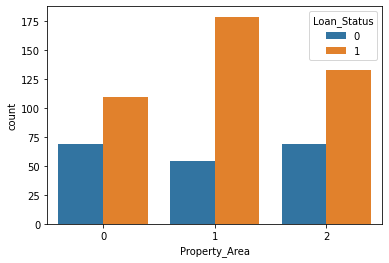

In [19]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area', hue= 'Loan_Status', data=df)

### Conclusion - Urban Candidate get more loan approval as compared to others.

### The rest of the column has continuous values. So, I will check their relation with target in the scatter plot.

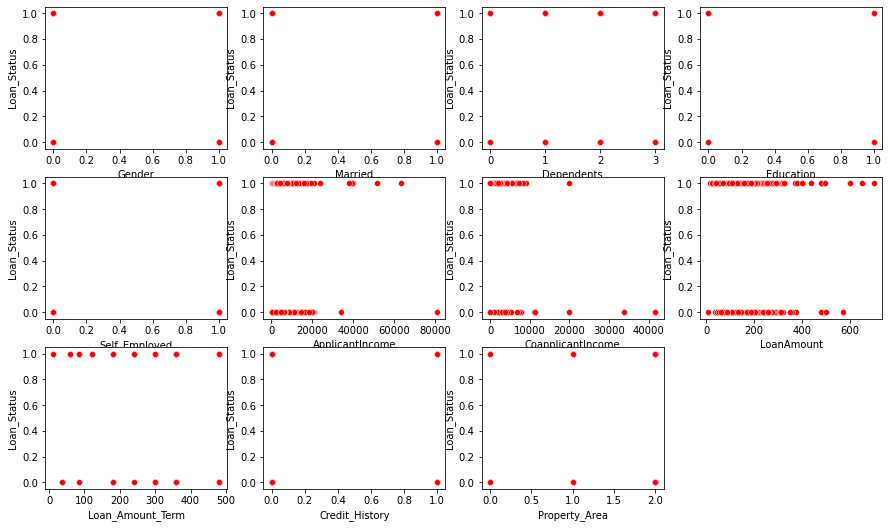

In [23]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']
plt.figure(figsize=(15,12))
pn=1
for column in x:
    if pn <= 16:
        plt.subplot(4,4, pn)
        sns.scatterplot(x[column],y , color = 'red' )
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

### Conclusion- The loan_status has normal trend with all features but loan_status is yes for more candidate who has small or medium loan amount. ApplicantIncome and Co-applocant is also has good trend with Loan_status. Coapplicant with high income dose not effect more on loan status. 

## Multicollinearity

<function matplotlib.pyplot.show(close=None, block=None)>

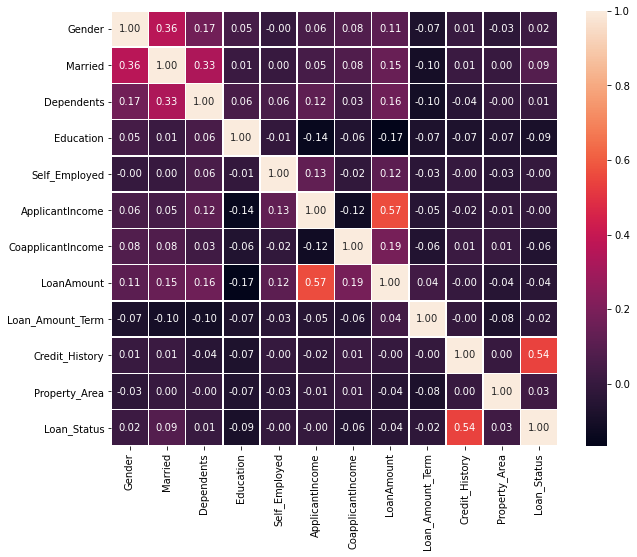

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### There are no feature has multicollinearity with each other. Dataset seems good to go. 

### The target has maximum trend with - Credit_History(54%)
### The target has minimum trend with - Dependent(1%)

### Checking the distribution of the values of the columns

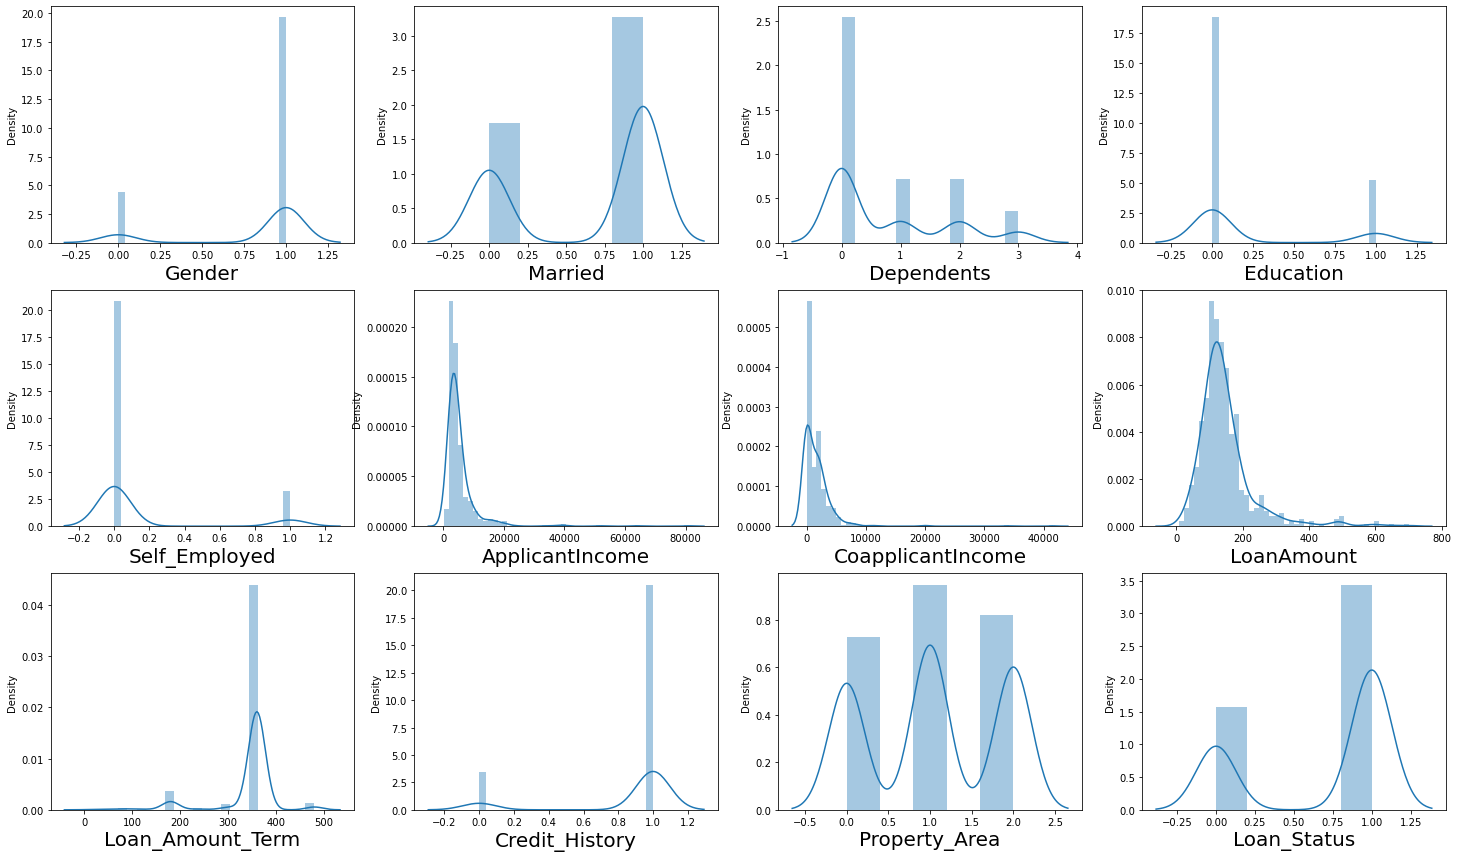

In [26]:
plt.figure(figsize=(25,20))
pn=1
for column in df:
    if pn <= 16:
        plt.subplot(4,4, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

### Most of the feature dose not has normal ditribution. The applicantincome and caapplicantincome has normal distribution but right skewed. LoanAmount has good distributuion but little bit right skewed. Other feature are categorical vales. So, we can sure about ditribution curve but I will ckeck skewness in the skewness checking step.

## Skewness

In [27]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
dtype: float64

### All the feature has skewness expect two which is Married and Property_Area. So, I will keep the thresold of skewness is +/-0.7 and try to remove the skewness with the power_transform technique

In [32]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x )
x=pd.DataFrame(x_new, columns=x.columns)

In [33]:
x.skew().sort_values() ## Cheking the power transfrom results.

Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
ApplicantIncome     -0.284434
CoapplicantIncome   -0.102698
LoanAmount          -0.056384
Property_Area       -0.041074
Dependents           0.377295
Loan_Amount_Term     0.496315
Education            1.367622
Self_Employed        2.159796
dtype: float64

### Most of the skewness is removed but some feature still has skewness, these features are categorical values. So, I can not work on that to remove because categorical features can has the some values out of the range. So, I will proceed further with these values.

### Checking the Outliers

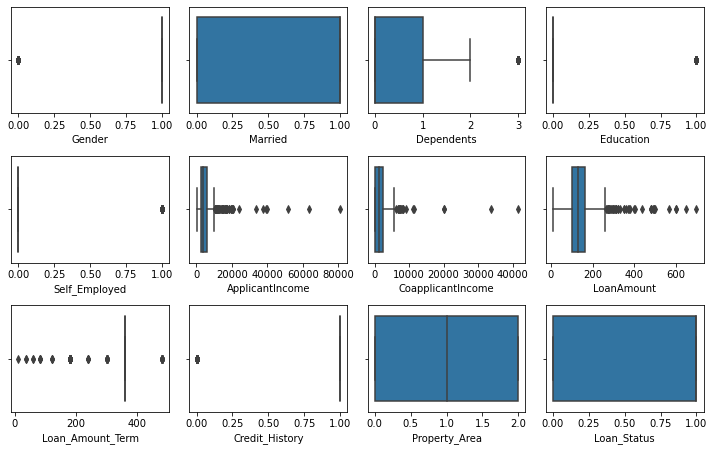

In [34]:
plt.figure(figsize=(10,8))
pn = 1
for column in df:
    if pn <= 16:
        ax = plt.subplot(4,4, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### Conclusion- Most of the outliers are in continuous values columne and those categorical features has the outliers which is only one and two even Married, Gender, Property_area and loan_Status has not any outliers. So, I will try to remove the outliers with the help of Zscore technique. 

In [35]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64),
 array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))

In [36]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(577, 12)

In [37]:
### Dataloss
data_loss= (614-577)/614*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 6.026058631921824


### The Dataloss is only 6.02 % which is acceptable for building the model. 

### Now the dataset is ready to prediction and model building and proceed toward to split the feature and target.

In [38]:
x= df_new.drop(columns="Loan_Status")
y=df_new["Loan_Status"]

In [40]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [42]:
#### Splitting the dataset into traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

461 461 116 116


In [43]:
### Importing the metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
### Importing the LogisticRegression and checking the score and cross validation score 
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
con = confusion_matrix(y_test,pred_lr)
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 84.48275862068965 
 Cross Validation score is  81.2863568215892 
 Classification report is  
               precision    recall  f1-score   support

           0       0.80      0.33      0.47        24
           1       0.85      0.98      0.91        92

    accuracy                           0.84       116
   macro avg       0.82      0.66      0.69       116
weighted avg       0.84      0.84      0.82       116
 
 Confusion Metrix is 
 [[ 8 16]
 [ 2 90]]


In [45]:
### Importing the RandomForestClassifier and  checking the score and cross validation score 
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
Clas_r = classification_report(y_test,pred_RFC)
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 85.34482758620689 
 Cross Validation score is  80.59370314842577 
 Classification report is  
               precision    recall  f1-score   support

           0       0.73      0.46      0.56        24
           1       0.87      0.96      0.91        92

    accuracy                           0.85       116
   macro avg       0.80      0.71      0.74       116
weighted avg       0.84      0.85      0.84       116
 
 Confusion Metrix is 
 [[11 13]
 [ 4 88]]


In [46]:
### Importing the DecisionTreeClassifier and checking the score and cross validation score  
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
acc_DTC =accuracy_score(y_test,pred_DTC)
scr = cross_val_score(DTC, x_scaled,y, cv=5)
Corss_dtc = scr.mean()
Clas_r = classification_report(y_test,pred_DTC)
con = confusion_matrix(y_test,pred_DTC)

print("\n DecisionTreeClassifier Model Accuracy",  '\n\nAccuracy_score for DecisionTreeClassifier model', acc_DTC*100, "\n Cross Validation score is ",Corss_dtc*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 DecisionTreeClassifier Model Accuracy 

Accuracy_score for DecisionTreeClassifier model 73.27586206896551 
 Cross Validation score is  71.58620689655172 
 Classification report is  
               precision    recall  f1-score   support

           0       0.41      0.62      0.49        24
           1       0.89      0.76      0.82        92

    accuracy                           0.73       116
   macro avg       0.65      0.69      0.66       116
weighted avg       0.79      0.73      0.75       116
 
 Confusion Metrix is 
 [[15  9]
 [22 70]]


In [47]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
from sklearn.neighbors import KNeighborsClassifier
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
con = confusion_matrix(y_test,pred_KNC)
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 79.3103448275862 
 Cross Validation score is  79.3808095952024 
 Classification report is  
               precision    recall  f1-score   support

           0       0.50      0.42      0.45        24
           1       0.85      0.89      0.87        92

    accuracy                           0.79       116
   macro avg       0.68      0.65      0.66       116
weighted avg       0.78      0.79      0.79       116
 
 Confusion Metrix is 
 [[10 14]
 [10 82]]


In [50]:
### Importing the SVC and checking the score and cross validation score
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
con = confusion_matrix(y_test,pred_svc)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 83.62068965517241 
 Cross Validation score is  81.287856071964 
 Classification report is  
               precision    recall  f1-score   support

           0       0.73      0.33      0.46        24
           1       0.85      0.97      0.90        92

    accuracy                           0.84       116
   macro avg       0.79      0.65      0.68       116
weighted avg       0.82      0.84      0.81       116
 
 Confusion Metrix is 
 [[ 8 16]
 [ 3 89]]


# I performed 5 model prediction Accuracy score, those score are mentioned below - 

#### Accuracy score and cross validation score for LogisticRegression model 84.48275862068965   and cross validation score is 81.2863568215892
#### Accuracy score and cross validation score for RandomForestClassifier model 85.34482758620689   and cross validation score is 80.59370314842577  
#### Accuracy score and cross validation score for DecisionTreeClassifier model 73.27586206896551   and cross validation score is 71.58620689655172
#### Accuracy score and cross validation score for KNeighborsClassifier model 79.3103448275862  and cross validation score is 79.3808095952024 
#### Accuracy score and cross validation score  for SVC model 83.62068965517241  and cross validation score is 81.287856071964

### From the above, I conclude that I will go forward with SupportVectorClassifier because the accuracy is good compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with SupportVectorClassifier. May the Accuracy will increase.


In [53]:
from sklearn.model_selection import GridSearchCV
sv= SVC()
param_grid = {"C":range(1,10),'gamma':['scale', 'auto']}
gridsearch = GridSearchCV(estimator=sv, param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 10), 'gamma': ['scale', 'auto']})

In [54]:
gridsearch.best_params_

{'C': 1, 'gamma': 'scale'}

In [61]:
sv = SVC(C=1,gamma='auto')
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
acc_sv =accuracy_score(y_test,pred_sv)
scr = cross_val_score(sv, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_sv)
con = confusion_matrix(y_test,pred_sv)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_sv*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 83.62068965517241 
 Cross Validation score is  81.287856071964 
 Classification report is  
               precision    recall  f1-score   support

           0       0.73      0.33      0.46        24
           1       0.85      0.97      0.90        92

    accuracy                           0.84       116
   macro avg       0.79      0.65      0.68       116
weighted avg       0.82      0.84      0.81       116
 
 Confusion Metrix is 
 [[ 8 16]
 [ 3 89]]


### I can not get better result by tunning the SVC but I will try to tune RandomForestClassifier because its has high accuracy but low validation score. So, I will to decrease the difference.

In [64]:
rfc = RandomForestClassifier()
para = {'n_estimators':[1,2,3,4,5,6],
       'criterion':['entropy','gini'],
        'max_depth':range(1,8),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(5,15)}
grid =  GridSearchCV(rfc, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 8),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [1, 2, 3, 4, 5, 6]})

In [65]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'n_estimators': 3}

In [89]:
rfc = RandomForestClassifier(n_estimators=3,
 min_samples_split= 4,
 min_samples_leaf=15,
 max_depth= 7,
 criterion= 'entropy')

In [90]:
### Importing the RandomForestClassifier and  checking the score and cross validation score 
rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
acc_rfc =accuracy_score(y_test,pred_rfc)
scr = cross_val_score(rfc, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
Clas_r = classification_report(y_test,pred_rfc)
con = confusion_matrix(y_test,pred_rfc)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_rfc*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 86.20689655172413 
 Cross Validation score is  80.42278860569715 
 Classification report is  
               precision    recall  f1-score   support

           0       0.79      0.46      0.58        24
           1       0.87      0.97      0.92        92

    accuracy                           0.86       116
   macro avg       0.83      0.71      0.75       116
weighted avg       0.85      0.86      0.85       116
 
 Confusion Metrix is 
 [[11 13]
 [ 3 89]]


### I got the increased accuracy but did not get better cross validation. So, I will keep SupportvectorClassifier.

### Plot ROC 

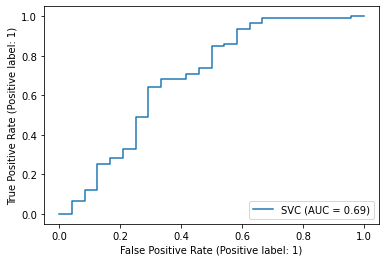

In [91]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.show()

### The curve show good accuracy.

## Conclusion 

### I tried very much to increase the Accuracy and decrease the difference between accuracy and cross validaion but did not get better result. So, I am going to save this model with SVC model 83.62068965517241  and cross validation score is 81.287856071964

### Saving the model

In [92]:
import joblib
joblib.dump(SVC, 'loan_prediction')

['loan_prediction']